### Data preparation
- Import helper modules for data/plotting.
- Load ICS and output tables, aggregate at institution, UoA, and institution-UoA levels.
- Attach panel labels/discipline grouping, then write the wrangled CSVs used by the figure.


In [1]:
%load_ext autoreload
%autoreload 2


In [2]:

from pathlib import Path
import importlib
import sys

import matplotlib as mpl

THIS_DIR = Path(__file__).resolve().parent if '__file__' in globals() else Path.cwd()
SRC_DIR = THIS_DIR if (THIS_DIR / 'figure_one_helpers.py').exists() else THIS_DIR / 'src'
if str(SRC_DIR) not in sys.path:
    sys.path.append(str(SRC_DIR))

import figure_one_helpers
importlib.reload(figure_one_helpers)
from figure_one_helpers import DEFAULT_DATA_ROOT

import figure_one_data
importlib.reload(figure_one_data)
from figure_one_data import prepare_figure_one_data, save_wrangled

mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['axes.titleweight'] = 'bold'

DATA_ROOT = DEFAULT_DATA_ROOT
WRANGLED_DIR = DATA_ROOT / 'wrangled'

# Load, aggregate, and annotate all needed tables
# Returns: df_ics (with Panel), df_uoa_m, df_uni_m, df_uniuoa_m
df_ics, df_uoa_m, df_uni_m, df_uniuoa_m = prepare_figure_one_data(DATA_ROOT)

# Persist the wrangled tables used downstream
save_wrangled(WRANGLED_DIR, df_uoa_m, df_uni_m, df_uniuoa_m)


### Figure creation
- Build the four-panel layout via helper functions.
- Render UoA scatter, panel bubble grid, panel-level violins, and ratio dot plot.
- Apply shared styling/formatting and save PDF/SVG/PNG outputs.


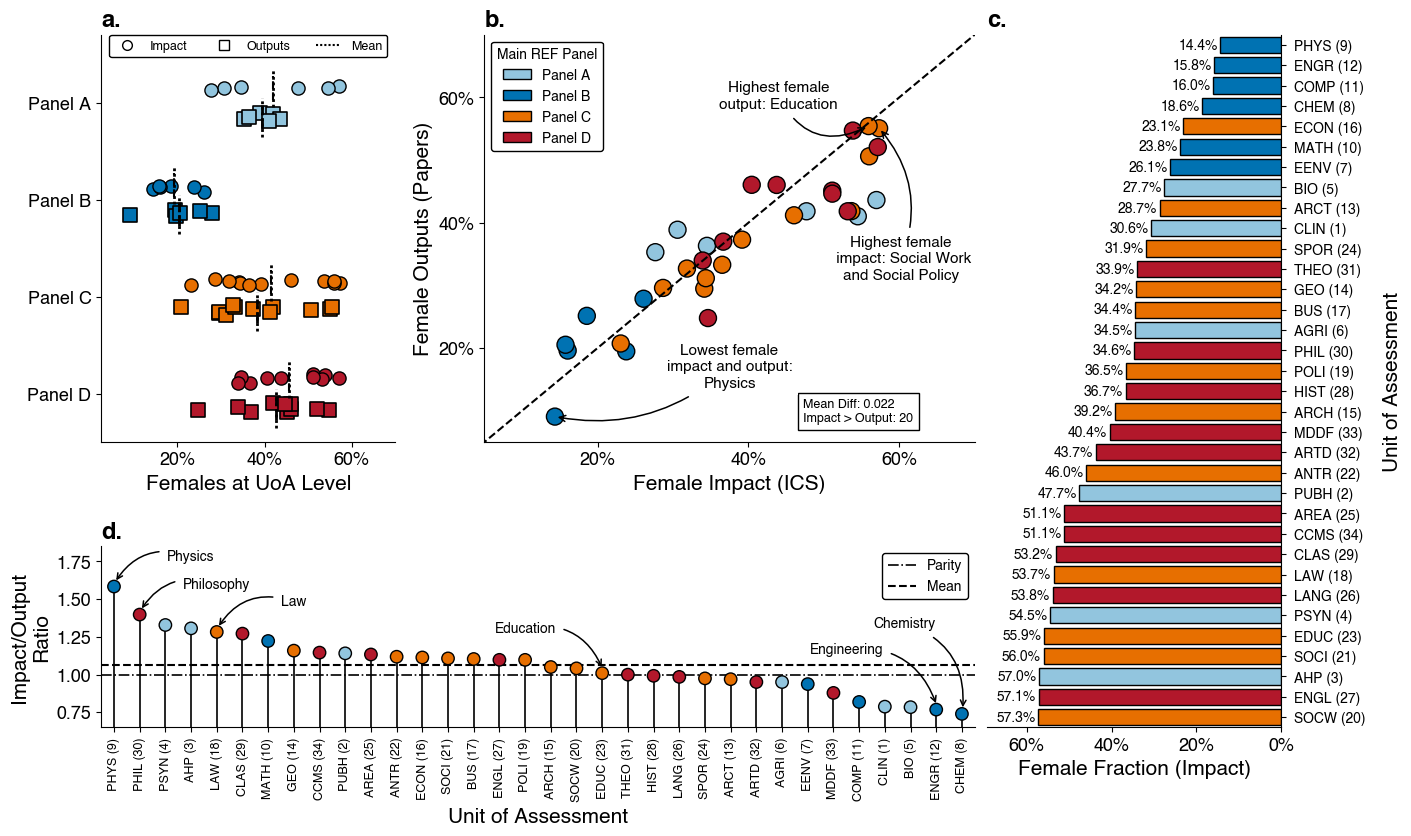

In [3]:
import matplotlib.pyplot as plt
from pathlib import Path
import importlib

import figure_one_plots
importlib.reload(figure_one_plots)
from figure_one_plots import plot_figure_one, save_figure
import matplotlib as mplW
mpl.rcParams['font.family'] = 'Helvetica'
mpl.rcParams['axes.titleweight'] = 'bold'
FIG_OUT_DIR = Path('../outputs/figures')
SHOW_UNIT_NAMES = True

fig, (ax1, ax2, ax3, ax4) = plot_figure_one(df_ics, df_uoa_m, show_unit_names=SHOW_UNIT_NAMES)
save_figure(fig, FIG_OUT_DIR, basename='figure_one')
plt.show()